<a href="https://colab.research.google.com/github/gk-gokul/image_diffusion/blob/main/Forward_Diffusion_fn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import urllib
from PIL import Image

In [24]:
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np


In [39]:
 def forward_diffusion(x0, t, beta = torch.linspace(0.0, 1.0, 5)):
   noise = torch.rand_like(x0)
   alpha = 1 - beta
   alpha_hat = torch.cumprod(alpha, axis=0)
   alpha_hat_t = alpha_hat.gather(-1,t).reshape(-1,1,1,1)


   mean =  alpha_hat_t.sqrt()*x0
   variance = torch.sqrt(1- alpha_hat_t) * noise
   return mean+variance, noise


In [40]:
link ='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTZmJy3aSZ1Ix573d2MlJXQowLCLQyIUsPdniOJ7rBsgG4XJb04g9ZFA9MhxYvckeKkVmo'
filename = 'racoon.jpg'

In [41]:
urllib.request.urlretrieve(link,filename)


('racoon.jpg', <http.client.HTTPMessage at 0x7d7f5b50e4d0>)

In [42]:
img = Image.open(filename)

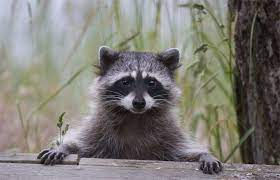

In [43]:
img

In [44]:
transform = transforms.Compose([
      transforms.Resize((32,32)),
      transforms.ToTensor(),
      transforms.Lambda(lambda t:((t*2)-1))
])
reverse_transform = transforms.Compose([
      transforms.Lambda(lambda t:(t+1)/2),
      transforms.Lambda(lambda t:t.permute(1,2,0)),
      transforms.Lambda(lambda t:t*255.),
      transforms.Lambda(lambda t:t.numpy().astype(np.uint8)),
      transforms.ToPILImage(),
])

In [45]:
torch_image = transform(img)

In [49]:
torch_image

tensor([[[ 0.5059,  0.3804,  0.4196,  ..., -0.5843, -0.6627, -0.5686],
         [ 0.4902,  0.3647,  0.4196,  ..., -0.5137, -0.6627, -0.6078],
         [ 0.4510,  0.3725,  0.4588,  ..., -0.4745, -0.5765, -0.6157],
         ...,
         [ 0.2235,  0.2157,  0.2078,  ..., -0.0667, -0.1529, -0.2235],
         [ 0.2706,  0.2706,  0.2941,  ...,  0.0118, -0.0039,  0.0039],
         [ 0.2314,  0.2549,  0.2627,  ..., -0.1294, -0.0667, -0.0667]],

        [[ 0.5451,  0.3961,  0.4588,  ..., -0.6549, -0.7412, -0.6549],
         [ 0.5294,  0.3804,  0.4588,  ..., -0.5843, -0.7412, -0.6941],
         [ 0.4902,  0.4039,  0.4980,  ..., -0.5294, -0.6471, -0.6863],
         ...,
         [ 0.1765,  0.1765,  0.1608,  ..., -0.1529, -0.2314, -0.2941],
         [ 0.2157,  0.2235,  0.2392,  ..., -0.0667, -0.0902, -0.0588],
         [ 0.1686,  0.2000,  0.2157,  ..., -0.2000, -0.1294, -0.1373]],

        [[ 0.6863,  0.5137,  0.6000,  ..., -0.6941, -0.7490, -0.6235],
         [ 0.6706,  0.4902,  0.6000,  ..., -0

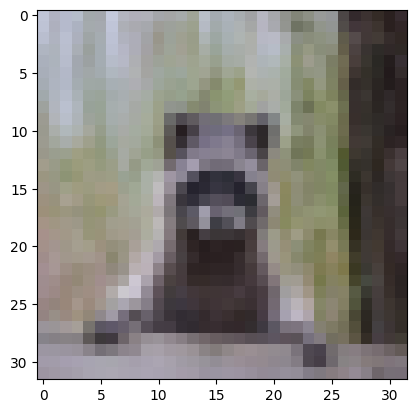

In [46]:
plt.imshow(reverse_transform(torch_image))

In [57]:
t = torch.tensor([0,1,2,3,4,])
batch_image = torch.stack([torch_image]*5)
noisy_images, _ = forward_diffusion(batch_image,t)


In [58]:
noisy_images.size()

torch.Size([5, 3, 32, 32])

In [54]:
noisy_images

tensor([[[[ 5.0588e-01,  3.8039e-01,  4.1961e-01,  ..., -5.8431e-01,
           -6.6275e-01, -5.6863e-01],
          [ 4.9020e-01,  3.6471e-01,  4.1961e-01,  ..., -5.1373e-01,
           -6.6275e-01, -6.0784e-01],
          [ 4.5098e-01,  3.7255e-01,  4.5882e-01,  ..., -4.7451e-01,
           -5.7647e-01, -6.1569e-01],
          ...,
          [ 2.2353e-01,  2.1569e-01,  2.0784e-01,  ..., -6.6667e-02,
           -1.5294e-01, -2.2353e-01],
          [ 2.7059e-01,  2.7059e-01,  2.9412e-01,  ...,  1.1765e-02,
           -3.9216e-03,  3.9216e-03],
          [ 2.3137e-01,  2.5490e-01,  2.6275e-01,  ..., -1.2941e-01,
           -6.6667e-02, -6.6667e-02]],

         [[ 5.4510e-01,  3.9608e-01,  4.5882e-01,  ..., -6.5490e-01,
           -7.4118e-01, -6.5490e-01],
          [ 5.2941e-01,  3.8039e-01,  4.5882e-01,  ..., -5.8431e-01,
           -7.4118e-01, -6.9412e-01],
          [ 4.9020e-01,  4.0392e-01,  4.9804e-01,  ..., -5.2941e-01,
           -6.4706e-01, -6.8627e-01],
          ...,
     

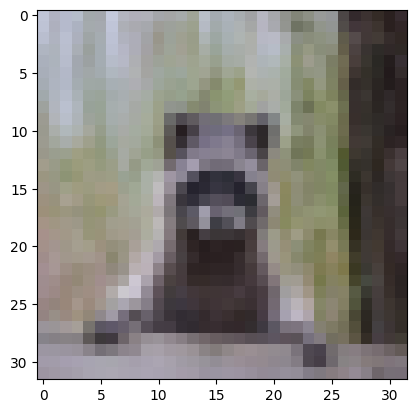

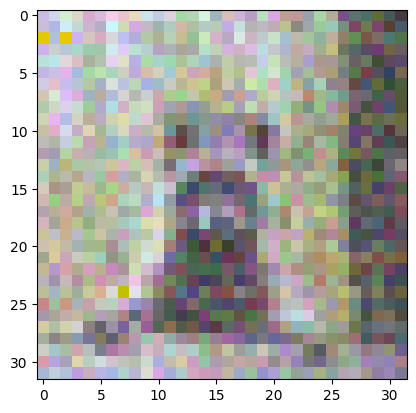

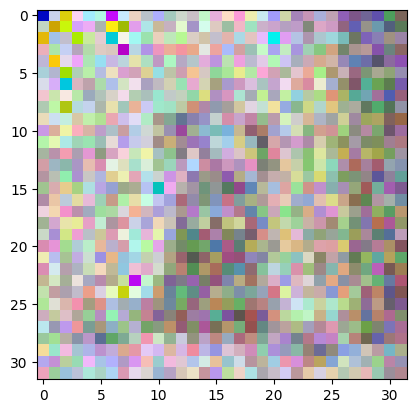

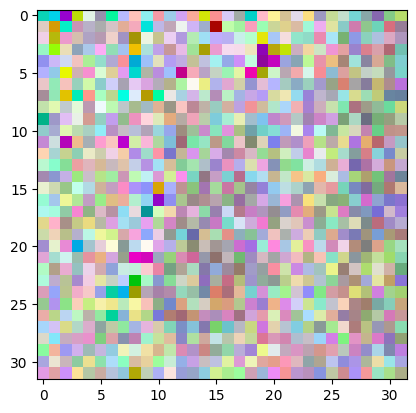

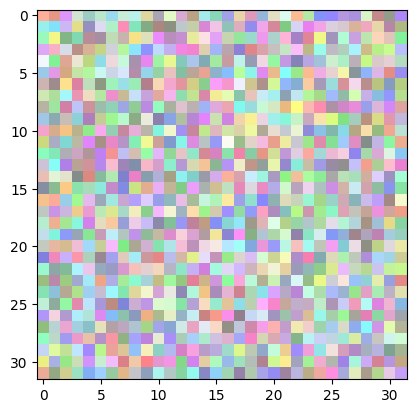

In [59]:
for img in noisy_images:
  plt.imshow(reverse_transform(img))
  plt.show()